In [1]:
# !pip install opendatasets

In [2]:
# import opendatasets as od

In [3]:
# od.download('stackoverflow-developer-survey-2020') 

In [4]:
import os

In [5]:
os.listdir('stackoverflow-developer-survey-2020')

['README.txt', 'survey_results_public.csv', 'survey_results_schema.csv']

In [6]:
import pandas as pd

In [7]:
survey_raw_df = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

In [8]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [9]:
schema_fname = 'stackoverflow-developer-survey-2020/survey_results_schema.csv'


In [10]:
pd.read_csv(schema_fname)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


In [11]:
# We are going to make the column as index
pd.read_csv(schema_fname,index_col ='Column')

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...
...,...
WebframeWorkedWith,Which web frameworks have you done extensive d...
WelcomeChange,"Compared to last year, how welcome do you feel..."
WorkWeekHrs,"On average, how many hours per week do you wor..."


In [12]:
schema_raw = pd.read_csv(schema_fname,index_col ='Column').QuestionText

In [13]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

## Data Preparation & Cleaning

In [14]:
selected_columns = [
    
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',

    # programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',

    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [15]:
# checking the length
len(selected_columns)

20

In [16]:
survey_df = survey_raw_df[selected_columns].copy()

In [17]:
schema = schema_raw[selected_columns]

In [18]:
survey_df.shape

(64461, 20)

In [19]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [20]:
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
schema.shape

(20,)

In [22]:
schema

Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageWorkedWith        Which programming, scripting, and markup langu...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
NEWLearn                  How frequently do you learn a new language or ...
NEWStuck                  What do you do when you get stuck on a problem...
Emplo

In [23]:
survey_df.Age1stCode.unique
# The unique() method in pandas is used to find all unique or distinct values in a specified column of a DataFrame. 

<bound method Series.unique of 0         13
1         19
2         15
3         18
4         16
        ... 
64456     16
64457    NaN
64458    NaN
64459    NaN
64460    NaN
Name: Age1stCode, Length: 64461, dtype: object>

In [24]:
schema.Age1stCode

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

In [25]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [26]:
# We can also do for all the data...
survey_df.YearsCode.unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [27]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode , errors = 'coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode , errors= 'coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro , errors = 'coerce')

#### The above process was needed because we want to perform some specific mathematic operation for this reason we need to convert all the values into numbers (int , float)

In [28]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [29]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace = True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace = True)

In [30]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45436.000000,57467.000000,56776.000000,44128.000000,41147.000000
mean,30.834294,15.476273,12.783130,8.870354,40.782153
std,9.506982,5.113997,9.490771,7.760095,17.816102
min,10.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,99.000000,85.000000,50.000000,50.000000,475.000000


In [31]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace = True)

In [32]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45319.000000,57326.000000,56636.000000,43993.000000,41002.000000
mean,30.832322,15.475317,12.783883,8.873003,40.024395
std,9.505965,5.114952,9.494519,7.762089,10.630010
min,10.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,43.000000
max,99.000000,85.000000,50.000000,50.000000,140.000000


In [33]:
# Now we are going to look for gender...
survey_df['Gender'].value_counts()             

Gender
Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: count, dtype: int64

In [34]:
import numpy as np

In [35]:
survey_df.where(~(survey_df.Gender.str.contains(';', na = False)), np.nan, inplace = True)

In [36]:
survey_df['Gender'].value_counts() 

Gender
Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

In [37]:
survey_df.sample(5)           #The .sample() function in pandas is used to randomly select rows or columns from a DataFrame.

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
50,Canada,NaN,NaN,Some college/university study without earning ...,I never declared a major,No,10.0,23.0,7.0,JavaScript;Python;SQL;TypeScript,NaN,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",35.0,Slightly satisfied,Flex time or a flexible schedule;Office enviro...,Often: 1-2 days per week or more,Somewhat important
38295,France,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,14.0,6.0,2.0,NaN,NaN,NaN,NaN,Employed full-time,"Developer, back-end",NaN,NaN,NaN,NaN,Fairly important
50805,Nigeria,21.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,15.0,3.0,NaN,HTML/CSS;JavaScript;Python,Go;HTML/CSS;JavaScript;Python;TypeScript,Once a year,Call a coworker or friend;Go for a walk or oth...,Student,NaN,NaN,NaN,Diversity of the company or organization;Flex ...,NaN,NaN
26200,Ireland,39.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,5.0,NaN,Bash/Shell/PowerShell;C;C#;HTML/CSS;Java;JavaS...,Bash/Shell/PowerShell;Java;JavaScript;Kotlin;Rust,Once a year,Visit Stack Overflow;Panic;Watch help / tutori...,Student,NaN,NaN,NaN,"Languages, frameworks, and other technologies ...",NaN,NaN
54524,Kenya,23.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",Yes,19.0,4.0,NaN,C++;HTML/CSS;Java;JavaScript;PHP;Python;SQL,Kotlin;Swift,Every few months,Do other work and come back later,"Not employed, but looking for work","Developer, mobile;Product manager",NaN,NaN,Flex time or a flexible schedule;Specific depa...,NaN,NaN


### Exploratory Analysis and Visualization

In [38]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [40]:
schema.Country

'Where do you live?'

In [41]:
survey_df.Country.nunique()   # the 'nunique' is going to retrun the exact vlaue of Country

183

In [42]:
survey_df.Country.value_counts()   # this is going to count all the values of countries

Country
United States          12371
India                   8364
United Kingdom          3881
Germany                 3864
Canada                  2175
                       ...  
Nauru                      1
Lesotho                    1
Saint Lucia                1
Antigua and Barbuda        1
Marshall Islands           1
Name: count, Length: 183, dtype: int64

In [43]:
# We just want to see the top 15 country then we can use the .head(15) alongside the value counts
survey_df.Country.value_counts().head(15)

Country
United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: count, dtype: int64

In [44]:
# now we've to store it in a variable ...
top_countries = survey_df.Country.value_counts().head(15)
top_countries

Country
United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: count, dtype: int64

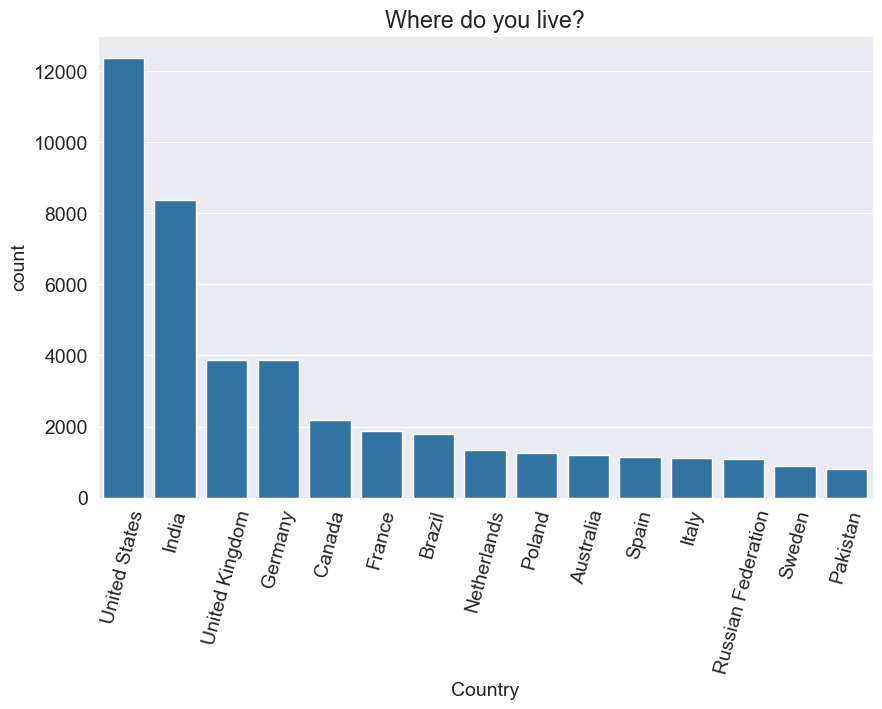

In [45]:
plt.xticks(rotation = 75)  # To avoid any overlaping of the indexes(name of the countries) we've done a rotation of 75 
plt.title(schema.Country)  # We are attaching the question here..
sns.barplot(x= top_countries.index ,y= top_countries);

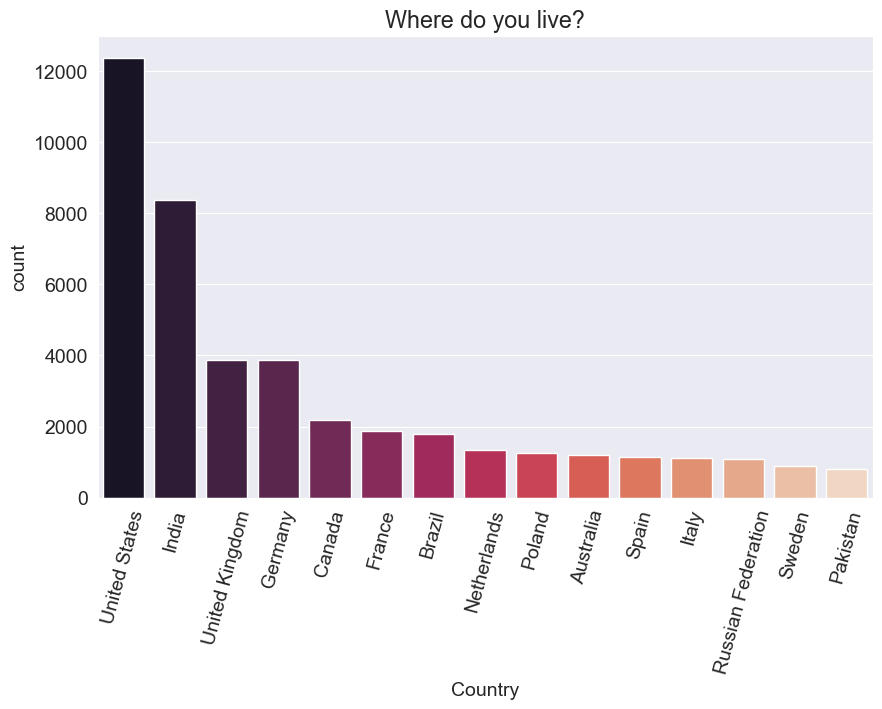

In [46]:
# Now if we want to showcase different color we need use the 'palette='viridis'' this argument and attribute..
plt.title(schema.Country)
plt.xticks(rotation = 75)
plt.legend([], [], frameon=False)  # Hide the legend
sns.barplot(x=top_countries.index, y=top_countries, hue=top_countries.index, palette="rocket", dodge=False);

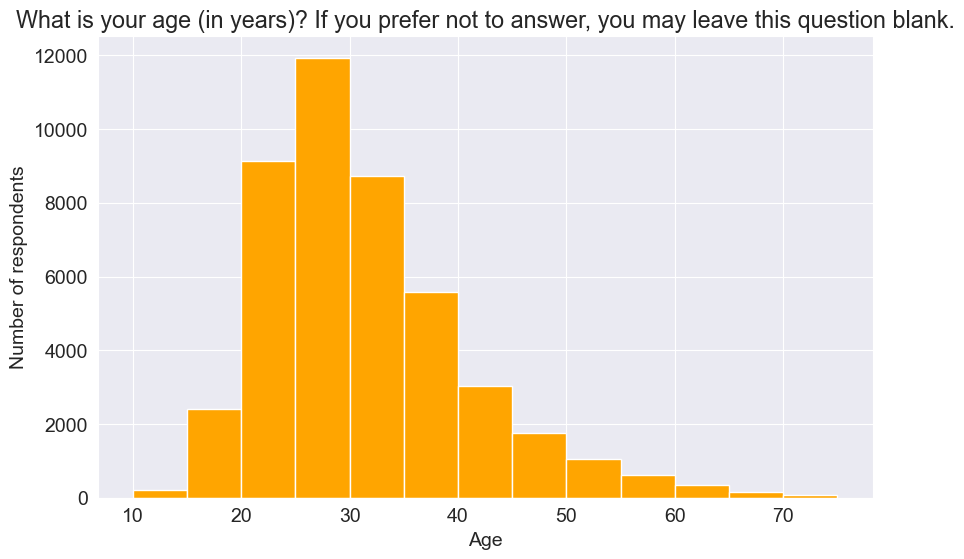

In [47]:
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age , bins = np.arange(10,80,5) , color = 'orange');

## Age

In [48]:
schema.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

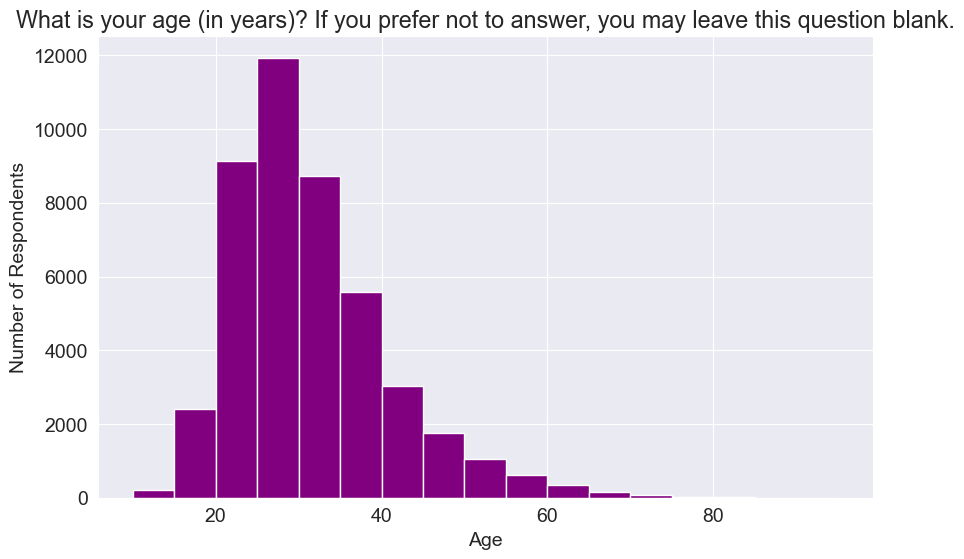

In [49]:
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of Respondents')

plt.hist(survey_df.Age , bins = np.arange(10,100,5), color = 'purple');

## Gender

In [50]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [51]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Gender
Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

### We're going to plot a pie chart for this part....

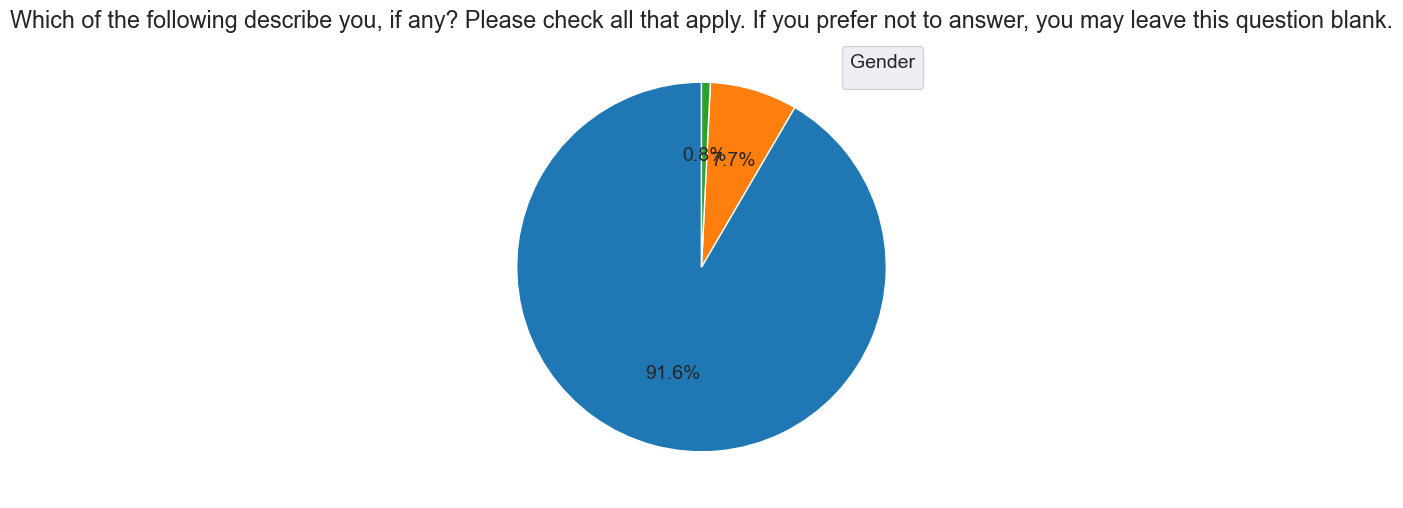

In [52]:
plt.title(schema.Gender)
plt.legend(gender_counts.index, title="Gender")
plt.pie(gender_counts , labels = None, autopct = '%1.1f%%', startangle = 90);

### Education level

In [53]:
schema.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

In [54]:
# there is no  need to do that but for better understanding we are going to do that
survey_df.EdLevel.value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26356
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13024
Some college/university study without earning a degree                                 7163
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4724
Associate degree (A.A., A.S., etc.)                                                    1831
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1681
Primary/elementary school                                                               929
Professional degree (JD, MD, etc.)                                                      793
I never completed any formal education                                                  480
Name: count, dtype: int64

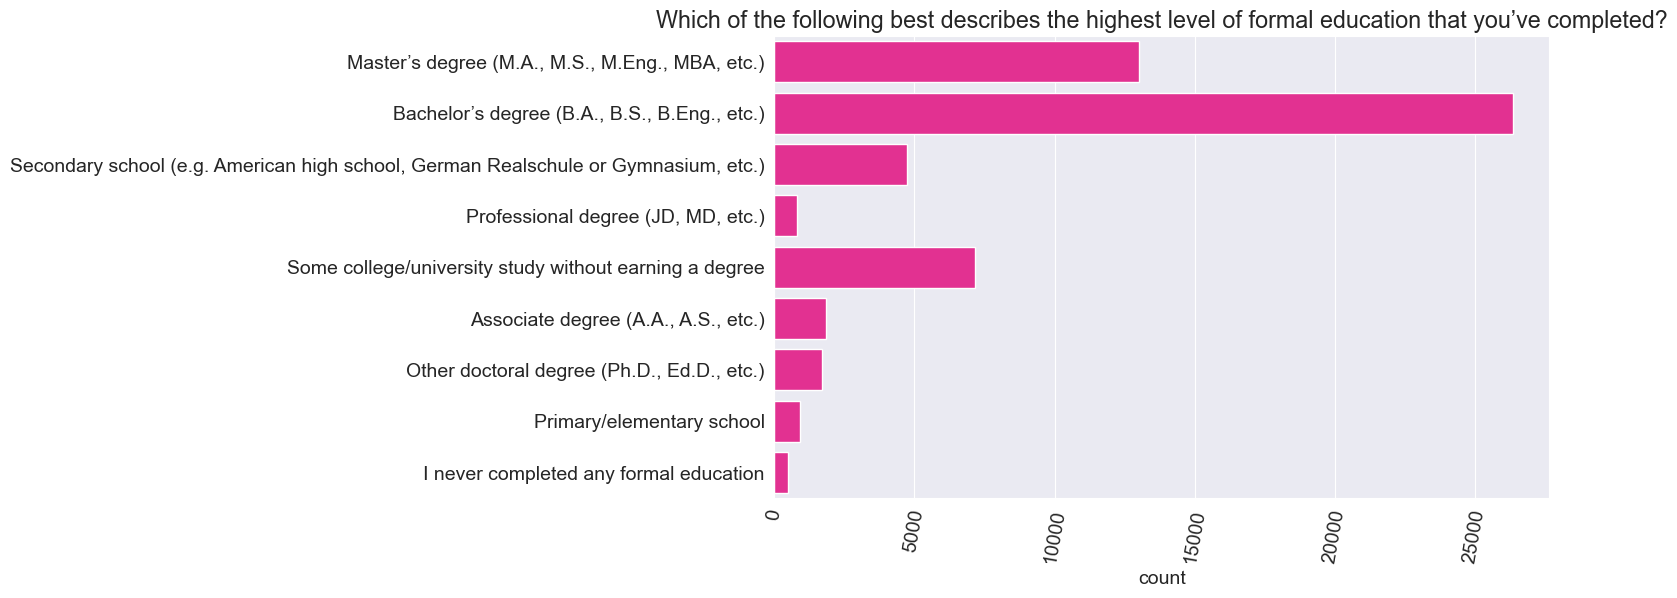

In [55]:
sns.countplot(y = survey_df.EdLevel , color ='deeppink')   # horizontal barchart
plt.xticks(rotation = 80);
plt.title(schema['EdLevel'])
plt.ylabel(None);

In [56]:
schema.UndergradMajor

'What was your primary field of study?'

In [57]:
# Undergradmajor.value_counts represent the total number of students of each major 
# UndergradMajor.count() represent the total numbers of students for all majors

undergrad_pct = survey_df.UndergradMajor.value_counts()*100 / survey_df.UndergradMajor.count()

In [58]:
undergrad_pct

UndergradMajor
Computer science, computer engineering, or software engineering                   61.939193
Another engineering discipline (such as civil, electrical, mechanical, etc.)       9.354195
Information systems, information technology, or system administration              7.983168
A natural science (such as biology, chemistry, physics, etc.)                      4.316561
Mathematics or statistics                                                          3.627097
Web development or web design                                                      3.502637
A business discipline (such as accounting, finance, marketing, etc.)               2.700567
A humanities discipline (such as literature, history, philosophy, etc.)            1.969616
A social science (such as anthropology, psychology, political science, etc.)       1.821450
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     1.412513
I never declared a major                                         

C:\Users\gopee\AppData\Local\Temp\ipykernel_5528\2581449493.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x= undergrad_pct ,  y= undergrad_pct.index , palette = 'Spectral')


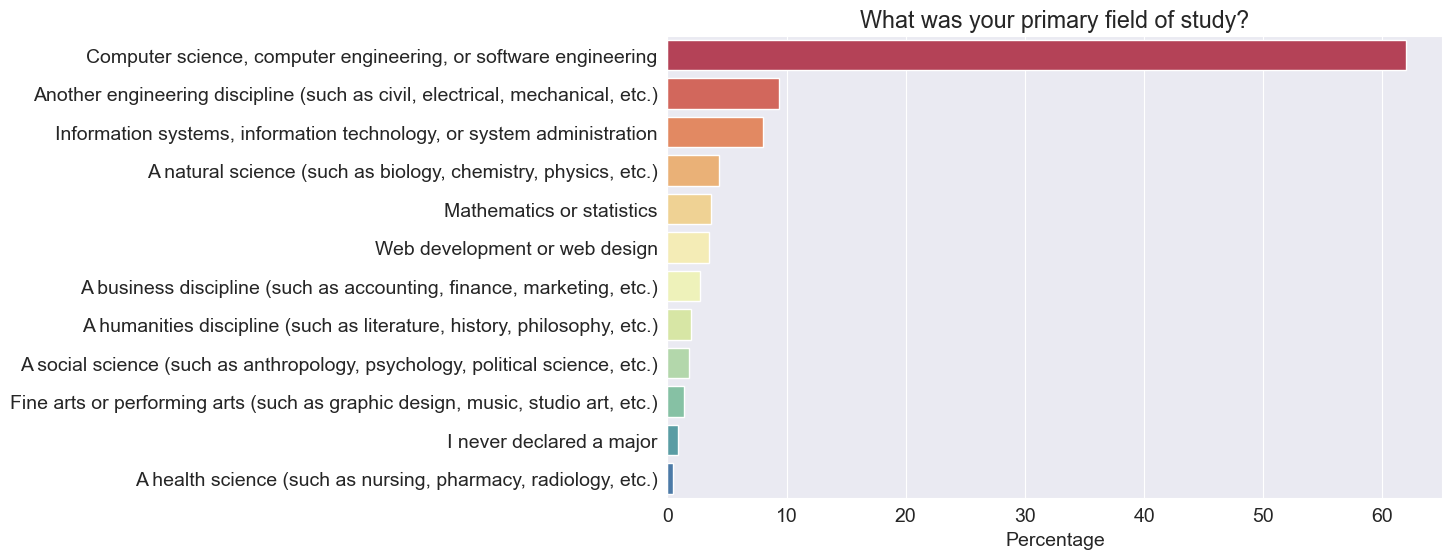

In [59]:
# Now we've to visualize the data for better understanding 

sns.barplot( x= undergrad_pct ,  y= undergrad_pct.index , palette = 'Spectral')

plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

### Employment

In [60]:
schema.Employment

'Which of the following best describes your current employment status?'

In [61]:
survey_df.Employment.value_counts()   # seeing the column 

Employment
Employed full-time                                      44958
Student                                                  7734
Independent contractor, freelancer, or self-employed     5619
Not employed, but looking for work                       2324
Employed part-time                                       2200
Not employed, and not looking for work                    318
Retired                                                   241
Name: count, dtype: int64

In [62]:
# creating percentsge out of it ...
employment_pct = survey_df.Employment.value_counts()*100/survey_df.Employment.count()

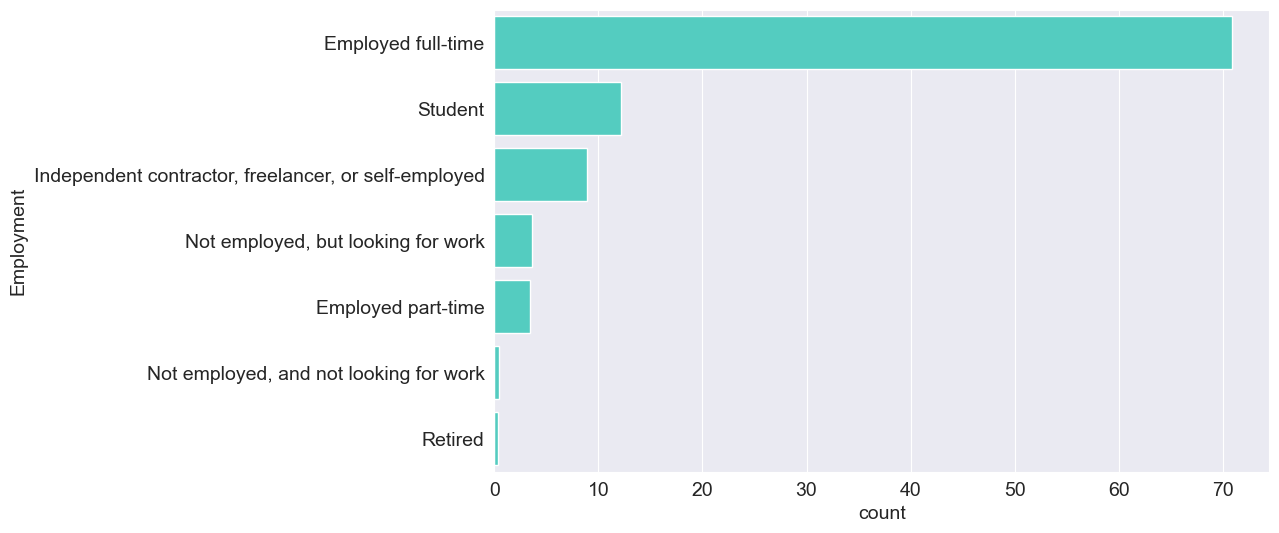

In [63]:
# Now let's visualize it ...
sns.barplot( x = employment_pct , y = employment_pct.index , color = 'turquoise' );

### DevType 

In [64]:
survey_df.DevType.value_counts()

DevType
Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                       

In [67]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column 
    for idx , value in col_series[col_series.notnull()].iteritems():    # we can't use the iteritems function because in new pandas it's not removed
        # Break each value into list of options
        for option in value.split(';'):
            # Add option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx , option] = True
    return result_df[options]

In [68]:
dev_type_df = split_multicolumn(survey_df.DevType)    # the data in the survey_df is too many that's why it's giving this  error

AttributeError: 'Series' object has no attribute 'iteritems'

In [70]:
import pandas as pd

def split_multicolumn(col_series):
    # List to keep track of all unique options
    options = []
    # Dictionary to store True/False values for each option
    data = {}
    
    # Iterate over the column
    for idx, value in col_series[col_series.notnull()].items():
        # Initialize dictionary for the current index
        data[idx] = {}
        # Break each value into a list of options
        for option in value.split(';'):
            if option not in options:
                options.append(option)
            data[idx][option] = True
    
    # Create a DataFrame with all False values
    result_df = pd.DataFrame(False, index=col_series.index, columns=options)
    
    # Fill the DataFrame with True where appropriate
    for idx, options_dict in data.items():
        for option in options_dict:
            result_df.at[idx, option] = True
    
    return result_df

In [71]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [72]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [73]:
# Now let's sort them out ...
dev_type_totals = dev_type_df.sum().sort_values(ascending = False)  # Decending Order
# As the values are True/False it means boolean they can be easily sum ( True = 1 , False = 0) 
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

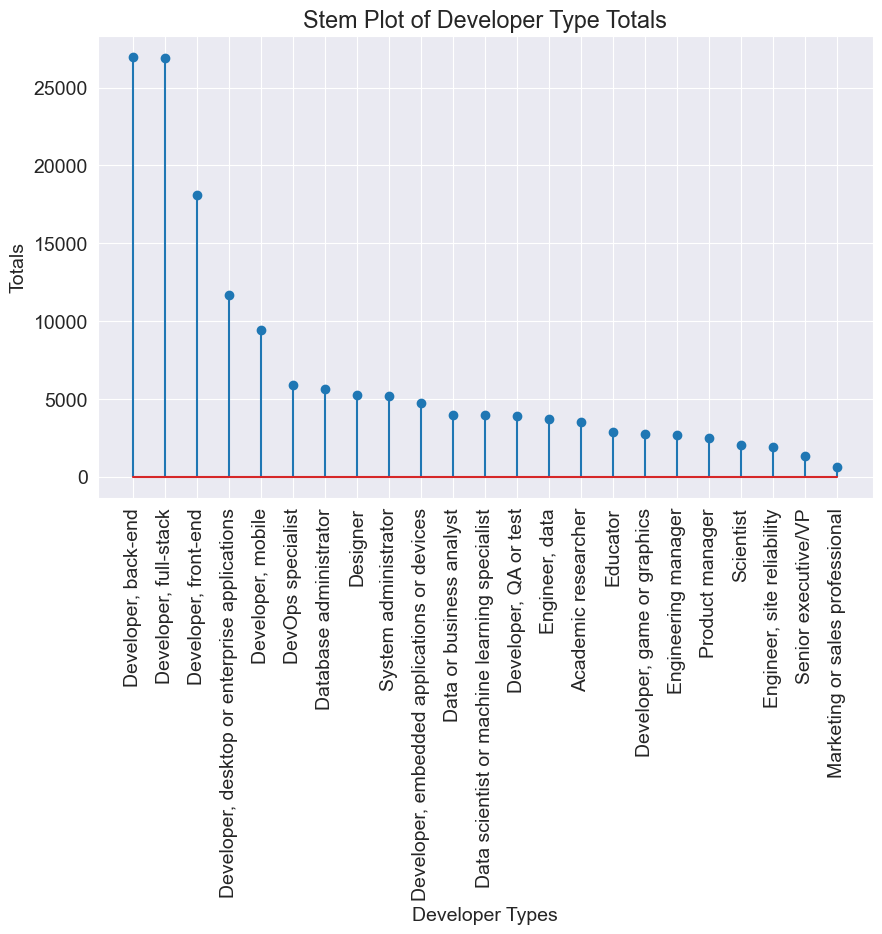

In [74]:
plt.stem(dev_type_totals.index, dev_type_totals.values)
plt.xlabel('Developer Types')
plt.xticks(rotation = 90)
plt.ylabel('Totals')
plt.title('Stem Plot of Developer Type Totals');

In [75]:
schema.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [76]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [77]:
language_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)
language_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [78]:
language_worked_pct = language_worked_df.mean().sort_values(ascending = False)*100

In [79]:
language_worked_pct

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

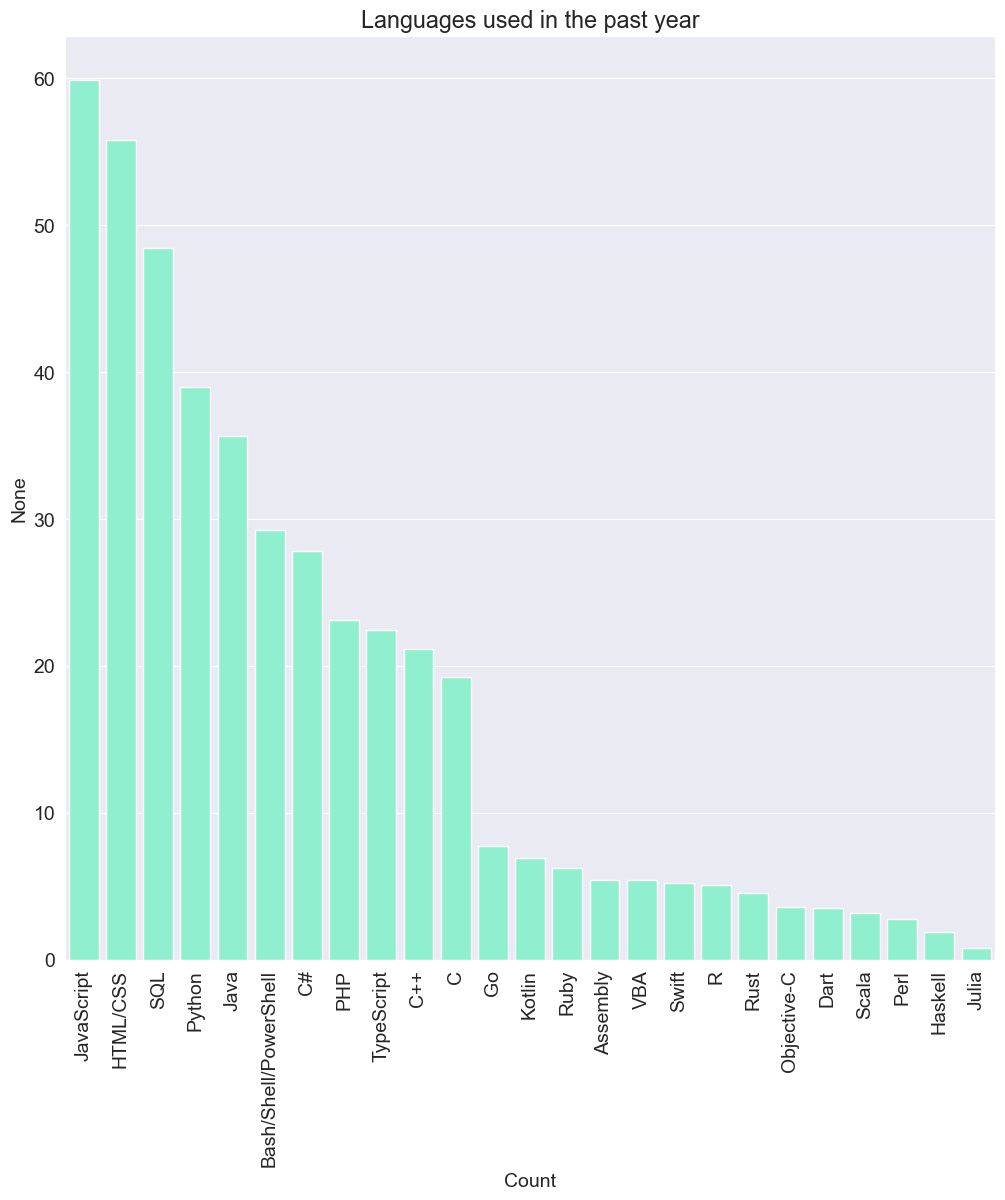

In [80]:
plt.figure(figsize = (12, 12))
plt.title('Languages used in the past year');
plt.xlabel('Count')
plt.xticks(rotation = 90)
sns.barplot( x = language_worked_pct.index , y = language_worked_pct , color = 'aquamarine' );

In [81]:
schema.LanguageDesireNextYear

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [82]:
language_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
language_interested_pct = language_interested_df.mean().sort_values(ascending = False)*100
language_interested_pct

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

C:\Users\gopee\AppData\Local\Temp\ipykernel_5528\1755703398.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = language_interested_pct , y = language_interested_pct.index , palette = "Paired" , width = 1.2);


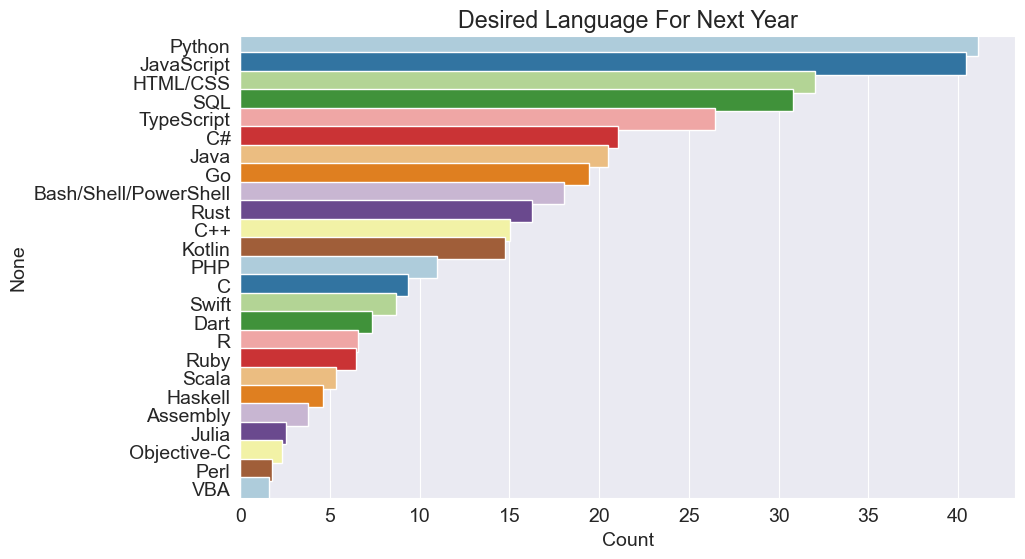

In [83]:
plt.title("Desired Language For Next Year")
plt.xlabel('Count')
sns.barplot(x = language_interested_pct , y = language_interested_pct.index , palette = "Paired" , width = 1.2);

In [84]:
language_loved_df = language_worked_df & language_interested_df
language_loved_df

,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,...,Perl,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
0,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [85]:
language_loved_pct = language_loved_df.sum().sort_values(ascending = False)
language_loved_pct

JavaScript               22475
HTML/CSS                 19196
SQL                      17635
Python                   16703
C#                       10660
Java                     10103
Bash/Shell/PowerShell    10095
TypeScript                9694
C++                       5895
PHP                       5538
C                         4080
Go                        3102
Kotlin                    2782
Rust                      2490
Swift                     1999
Ruby                      1712
R                         1447
Dart                      1404
Scala                     1079
Assembly                  1019
VBA                        675
Haskell                    615
Objective-C                536
Perl                       503
Julia                      309
dtype: int64

C:\Users\gopee\AppData\Local\Temp\ipykernel_5528\663924968.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = language_loved_pct , y = language_loved_pct.index , palette = 'Set2');


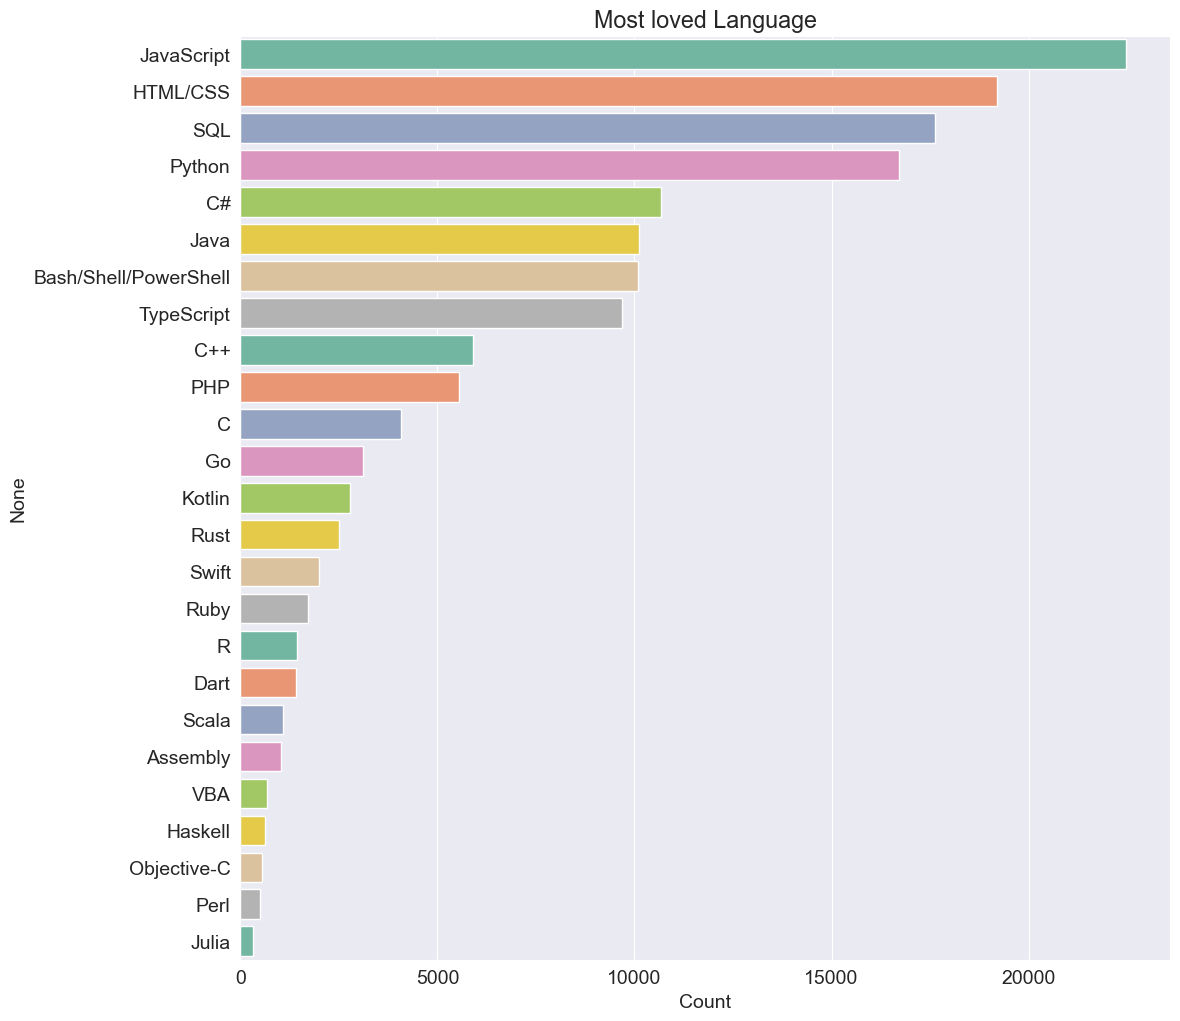

In [86]:
# Visualization
plt.figure(figsize = (12,12))
plt.title("Most loved Language")
plt.xlabel("Count")
sns.barplot(x = language_loved_pct , y = language_loved_pct.index , palette = 'Set2');

In [87]:
# to get a dataframe with only the work hour weed need to use the groupby function
country_work_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs' , ascending = False)
country_work_df

,WorkWeekHrs
Country,
Kuwait,58.222222
Iraq,52.153846
Grenada,50.000000
Maldives,47.300000
Afghanistan,46.500000
...,...
North Korea,NaN
Saint Lucia,NaN
Sierra Leone,NaN


In [88]:
high_response_df = country_work_df.loc[survey_df.Country.value_counts()  > 250].head(15)
high_response_df

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


C:\Users\gopee\AppData\Local\Temp\ipykernel_5528\3092446162.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(


Text(0.5, 1.0, 'Average Work Hours by Country')

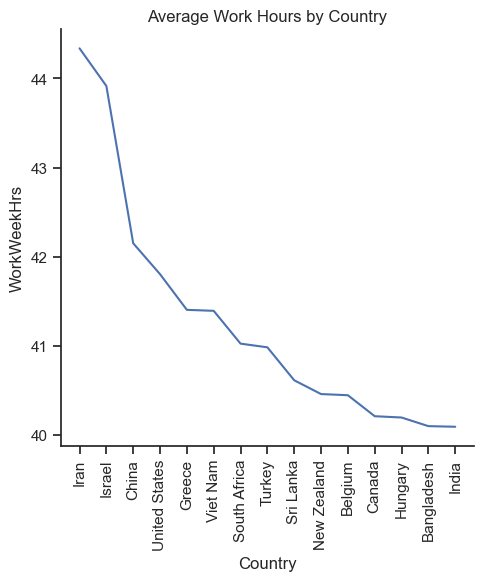

In [89]:
# Set the theme for the plot
sns.set_theme(style="ticks")

# Assuming high_response_df is your DataFrame with the columns 'Country' and 'WorkWeekHrs'
# Define the palette
palette = sns.color_palette("rocket_r")

# Create a relational plot
sns.relplot(
    data=high_response_df,
    x="Country", y="WorkWeekHrs",
    kind="line", palette=palette,
    facet_kws=dict(sharex=False)
)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)
plt.title('Average Work Hours by Country')

In [90]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

Text(0, 0.5, 'Years of professional experience')

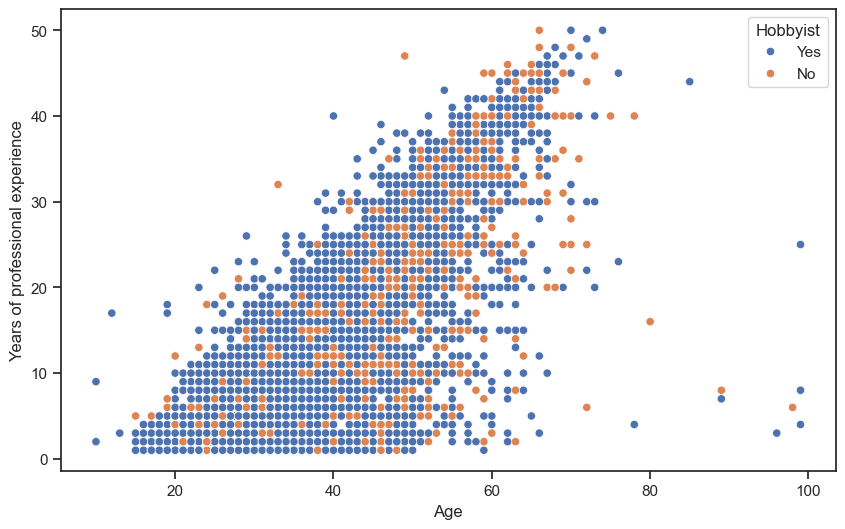

In [91]:
sns.scatterplot( x ='Age', y= 'YearsCodePro', hue = 'Hobbyist', data = survey_df)
plt.xlabel('Age')
plt.ylabel('Years of professional experience')

C:\Users\gopee\AppData\Local\Temp\ipykernel_5528\698504777.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(survey_df.Age1stCode)


<Axes: title={'center': 'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'}, xlabel='Age1stCode', ylabel='Density'>

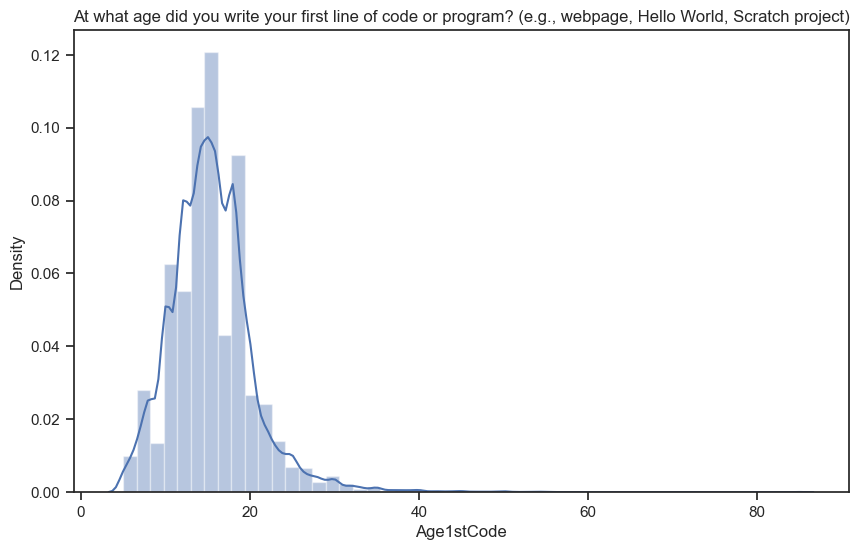

In [92]:
# We can also view the distribution of 'Age!stCode' column to see when the respondents tried programming for the first time...
plt.title(schema.Age1stCode)
sns.distplot(survey_df.Age1stCode)

## Inferences & Conclusions